## PySpark for BigData Analysis

### Import Libraries for Python Spark

In [1]:
from pyspark import SparkContext

from pyspark.sql import SparkSession



# Import the library for ALS
from pyspark.mllib.recommendation import ALS

# Import the library for Logistic Regression
from pyspark.mllib.classification import LogisticRegressionWithLBFGS

# Import the library for Kmeans
from pyspark.mllib.clustering import KMeans


#Rating import from Recommendation 
from pyspark.mllib.recommendation import Rating




### Initialize Sparkcontext

In [2]:
sc = SparkContext()

### Methods of Python Spark

In [3]:
print('Spark Conext version is :',sc.version)
print('Python Spark Context version is:',sc.pythonVer)
print('PySpark Shell is:',sc.master)


Spark Conext version is : 2.4.5
Python Spark Context version is: 3.7
PySpark Shell is: local[*]


In [4]:
#Use of Pyspark for generating Random Numbers from 1 to 100

numb = range(1,100)
spark_data = sc.parallelize(numb)


### Use of Lambda and Map:

The map() function in Python returns a list of the results after applying the given function to each item of a given iterable 
(list, tuple etc.). 
The general syntax of map() function is map(fun, iter). 

In [5]:
my_list = [1,2,3,4,5,6,7,8,9,10]

print('List items are',my_list)


squared_number = list(map(lambda x:x**2,my_list))

print('Square of number is :',squared_number)


List items are [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Square of number is : [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


### Use of lambda() with filter()

Another function that is used extensively in Python is the filter() function. The filter() function in Python takes in a function and a list as arguments. The general syntax of the filter() function is filter(function, list_of_input)

In [6]:
my_list2 = [10, 21, 31, 40, 51, 60, 72, 80, 93, 101]

print('My List',my_list2)

filtered_list = list(filter(lambda x:(x%10==0),my_list2))
print('Filtered list is ', filtered_list)


My List [10, 21, 31, 40, 51, 60, 72, 80, 93, 101]
Filtered list is  [10, 40, 60, 80]


## Programming in PySpark RDD

In [7]:
#Creating of RDD


rdd = sc.parallelize(['Spark','is','framework for','bigdata processing'])

print(type(rdd))

<class 'pyspark.rdd.RDD'>


In [8]:
rdd = sc.textFile('../PySpark/5000_points.txt')
type(rdd)

pyspark.rdd.RDD

### Partitions - getNumPartitions or define Partitions 

In [9]:
print('Number of Partitions is', rdd.getNumPartitions())

rdd_part_define = sc.textFile('../PySpark/5000_points.txt',minPartitions=5)
print('Minimum Partitions is ',rdd_part_define.getNumPartitions())


Number of Partitions is 2
Minimum Partitions is  5


### RDD Operations in PySpark

map()-Transformation:

Collect() Transformation : 

            Collect returns all the elements of the dataset as an array.

take(N): 

            Returns N number of elements
    


In [10]:
list2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
numb_rdd = sc.parallelize(list2)
cube_rdd = numb_rdd.map(lambda x: x**3)
num_squared = cube_rdd.collect()

for num in num_squared:
    print(num)


1
8
27
64
125
216
343
512
729
1000


### Reduce by key and collect:
    
    One of the most popular pair RDD transformations is reduceByKey() which operates on key, value (k,v) pairs and merges the values for each key. 

In [11]:
rdd = sc.parallelize([(1,2),(3,4),(3,6),(4,5)])

rdd_reduced = rdd.reduceByKey(lambda x,y:x+y)


for num in rdd_reduced.collect():
    print('key has {} has {} counts'.format(num[0],num[1]))
   

key has 1 has 2 counts
key has 3 has 10 counts
key has 4 has 5 counts


### SortByKey and Collect
Many times it is useful to sort the pair RDD based on the key 

In [12]:
rdd_sort = rdd_reduced.sortByKey(ascending=False)

for num in rdd_sort.collect():
    print('key has {} has {} counts'.format(num[0],num[1]))
   

key has 4 has 5 counts
key has 3 has 10 counts
key has 1 has 2 counts


### Count by keys 

In [13]:
print('Number of elements in rdd are :',rdd.collect())

total = rdd.countByKey()

print('Type of total is ',type(total))

#iterating the count

for k,v in total.items():
    print('key is',k,'count is ',v )

Number of elements in rdd are : [(1, 2), (3, 4), (3, 6), (4, 5)]
Type of total is  <class 'collections.defaultdict'>
key is 1 count is  1
key is 3 count is  2
key is 4 count is  1


### Base RDD and Transformation of unstructured data

<b>flatMap:</b> A flatMap is a transformation operation. It applies to each element of RDD and it returns the result as new RDD. It is similar to Map, but FlatMap allows returning 0, 1 or more elements from map function. In the FlatMap operation, a developer can define his own custom business logic. The same logic will be applied to all the elements of the RDD.

In [14]:
#Load the unstructured text file data
baseRDD = sc.textFile('../PySpark/Complete_Shakespeare.txt')

#Split the words

splitRDD = baseRDD.flatMap(lambda x:x.split())

#Count the words
print('Total number of Words ',splitRDD.count())



Total number of Words  128576


### Remove Stop Words and reduce the dataset

In [15]:
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he',
 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have',
 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while',
 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below',
 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when',
 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own',
 'same', 'so', 'than', 'too', 'very', 'can', 'will', 'just', 'don', 'should', 'now']



filter_by_rdd = splitRDD.filter(lambda x: x.lower() not in stop_words)

split_rdd_no_stop_words = filter_by_rdd.map(lambda w:(w,1))

resultRDD = split_rdd_no_stop_words.reduceByKey(lambda x,y: x+y)

print('First 10 result rdd is as follows')

resultRDD.take(10)


First 10 result rdd is as follows


[('Project', 9),
 ('EBook', 1),
 ('Shakespeare', 12),
 ('use', 38),
 ('anyone', 1),
 ('anywhere', 1),
 ('restrictions', 1),
 ('whatsoever.', 1),
 ('may', 162),
 ('it,', 74)]

### Print Word frequencies

In [16]:
#Swap the values
resultrdd_swap = resultRDD.map(lambda x:(x[1],x[0]))

#Sort the keys in descending order

resultrdd_swap_sort = resultrdd_swap.sortByKey(ascending=False)

for word in resultrdd_swap_sort.take(10):
    print("{} has {} counts". format(word[1], word[0]))



thou has 650 counts
thy has 574 counts
shall has 393 counts
would has 311 counts
good has 295 counts
thee has 286 counts
love has 273 counts
Enter has 269 counts
th' has 254 counts
make has 225 counts


### RDD to DataFrame



In [17]:
#Creating a Session using getvreate method

spark = SparkSession.builder.getOrCreate()


sample = ('Mona',20), ('Jennifer',34), ('John',20), ('Jim',26)


rdd_list = sc.parallelize(sample)

names = ['Name','Value']

rdd = spark.createDataFrame(rdd_list,schema=names)

rdd.show(10)


+--------+-----+
|    Name|Value|
+--------+-----+
|    Mona|   20|
|Jennifer|   34|
|    John|   20|
|     Jim|   26|
+--------+-----+



### Loading CSV file into a Dataframe

In [18]:
people_df  = spark.read.csv('../PySpark/people.csv',header=True,inferSchema=True)
print('Type ',type(people_df))
people_df.show(5)

Type  <class 'pyspark.sql.dataframe.DataFrame'>
+---+---------+--------------+------+-------------+
|_c0|person_id|          name|   sex|date of birth|
+---+---------+--------------+------+-------------+
|  0|      100|Penelope Lewis|female|   1990-08-31|
|  1|      101| David Anthony|  male|   1971-10-14|
|  2|      102|     Ida Shipp|female|   1962-05-24|
|  3|      103|  Joanna Moore|female|   2017-03-10|
|  4|      104|Lisandra Ortiz|female|   2020-08-05|
+---+---------+--------------+------+-------------+
only showing top 5 rows



### Print Schema

In [19]:
people_df.printSchema

<bound method DataFrame.printSchema of DataFrame[_c0: int, person_id: int, name: string, sex: string, date of birth: string]>

### Inspecting the Dataframe

In [20]:

print('Columns of the datframe are',people_df.columns)
print('Length of the columns',len(people_df.columns))
print('Number of rows',people_df.count())

Columns of the datframe are ['_c0', 'person_id', 'name', 'sex', 'date of birth']
Length of the columns 5
Number of rows 100000


In [21]:
print('Before removing duplicates,number of rows', people_df.count())

people_df_name = people_df.select('name','sex','date of birth')
people_df_drop_duplicates = people_df_name.dropDuplicates()

print('After duplication removal',people_df_drop_duplicates.count())



Before removing duplicates,number of rows 100000
After duplication removal 99998


### Filter in DataFrame

In [22]:
people_df_male = people_df.filter(people_df.sex=='male')
people_df_female = people_df.filter(people_df.sex=='female')

print('Count of male is {} and female is {}'.format(people_df_male.count(),people_df_female.count()))

Count of male is 49066 and female is 49014


### Create Temporary Table 

In [23]:
people_df.createOrReplaceTempView('People') #table name is here People

query = 'select * from people'

people_query = spark.sql(query) #executing the sql

people_query.show(10) #Show 10 rows of the query



+---+---------+----------------+------+-------------+
|_c0|person_id|            name|   sex|date of birth|
+---+---------+----------------+------+-------------+
|  0|      100|  Penelope Lewis|female|   1990-08-31|
|  1|      101|   David Anthony|  male|   1971-10-14|
|  2|      102|       Ida Shipp|female|   1962-05-24|
|  3|      103|    Joanna Moore|female|   2017-03-10|
|  4|      104|  Lisandra Ortiz|female|   2020-08-05|
|  5|      105|   David Simmons|  male|   1999-12-30|
|  6|      106|   Edward Hudson|  male|   1983-05-09|
|  7|      107|    Albert Jones|  male|   1990-09-13|
|  8|      108|Leonard Cavender|  male|   1958-08-08|
|  9|      109|  Everett Vadala|  male|   2005-05-24|
+---+---------+----------------+------+-------------+
only showing top 10 rows



<b> Note :</b> Spark SQL operations generally return DataFrames. This means you can freely mix DataFrames and SQL.

### Filter in SQL

In [24]:
people_df_male = spark.sql('select * from people where sex == "male"')
people_df_female = spark.sql('select * from people where sex == "female"')

print('Count of Male',people_df_male.count())
print('Count of Female',people_df_female.count())

Count of Male 49066
Count of Female 49014


### Visualization in Spark

RDD contents are:
+--------+-----+
|    Name|Value|
+--------+-----+
|    Mona|   20|
|Jennifer|   34|
|    John|   20|
|     Jim|   26|
+--------+-----+



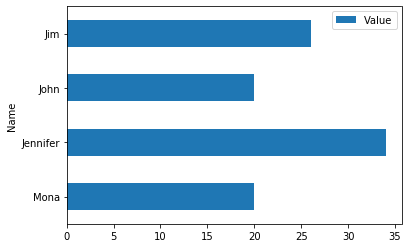

In [25]:

print('RDD contents are:')
rdd.show()

df_pandas = rdd.toPandas()

df_pandas.plot(x='Name',y='Value',kind='barh')


### Create a dataframe from a CSV File

In [26]:
fifa_df = spark.read.csv('../PySpark/Fifa2018_dataset.csv',header=True,inferSchema=True)

fifa_df.count()

17981

### SQL Queries on Temporary table

In [27]:
fifa_df.createOrReplaceTempView('fifa_table_temp') 
fifa_germany = spark.sql('select * from fifa_table_temp where Nationality="Germany"')
fifa_germany.describe()


DataFrame[summary: string, _c0: string, Name: string, Age: string, Photo: string, Nationality: string, Flag: string, Overall: string, Potential: string, Club: string, Club Logo: string, Value: string, Wage: string, Special: string, Acceleration: string, Aggression: string, Agility: string, Balance: string, Ball control: string, Composure: string, Crossing: string, Curve: string, Dribbling: string, Finishing: string, Free kick accuracy: string, GK diving: string, GK handling: string, GK kicking: string, GK positioning: string, GK reflexes: string, Heading accuracy: string, Interceptions: string, Jumping: string, Long passing: string, Long shots: string, Marking: string, Penalties: string, Positioning: string, Reactions: string, Short passing: string, Shot power: string, Sliding tackle: string, Sprint speed: string, Stamina: string, Standing tackle: string, Strength: string, Vision: string, Volleys: string, CAM: string, CB: string, CDM: string, CF: string, CM: string, ID: string, LAM: st

### Data Visualization

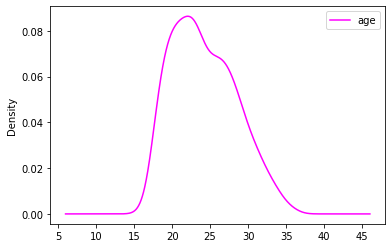

In [28]:
fifa_germany_age = fifa_germany.selectExpr('age') 
fifa_table_pandas = fifa_germany_age.toPandas()
fifa_table_pandas.plot(kind='density',color='magenta')

### PySpark Machine Learning using <b>MLLIB</b>

In [29]:
data = sc.textFile('ratings.csv')
# Split the RDD 
ratings = data.map(lambda l: l.split(','))

# Transform the ratings RDD 
ratings_final = ratings.map(lambda line: Rating(int(line[0]), int(line[1]), float(line[2])))

# Split the data into training and test
training_data, test_data = ratings_final.randomSplit([0.8, 0.2])

# Create the ALS model on the training data
model = ALS.train(training_data, rank=10, iterations=10)


# Split the data into training and test
training_data, test_data = ratings_final.randomSplit([0.8, 0.2])

# Create the ALS model on the training data
model = ALS.train(training_data, rank=10, iterations=10)

# Drop the ratings column 
testdata_no_rating = test_data.map(lambda p: (p[0], p[1]))

# Predict the model  
predictions = model.predictAll(testdata_no_rating)

# Print the first rows of the RDD
predictions.take(2)

# Prepare ratings data
rates = ratings_final.map(lambda r: ((r[0], r[1]), r[2]))

# Prepare predictions data
preds = predictions.map(lambda r: ((r[0], r[1]), r[2]))

# Join the ratings data with predictions data
rates_and_preds = rates.join(preds)

# Calculate and print MSE
MSE = rates_and_preds.map(lambda r: (r[1][0] - r[1][1])**2).mean()
print("Mean Squared Error of the model for the test data = {:.2f}".format(MSE))



Mean Squared Error of the model for the test data = 1.36
